In [119]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import random

In [120]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000

In [121]:
# Read from pickled file
df = pd.read_csv(r'C:\Users\user\OneDrive - Seedergy\MAEN\Code\Projects\Courses\Thinkful2020\ess_combined_2012_2014.csv')

# European Social Survey

#### More info about variables: https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html

Abstract.
European Social Survey (ESS) is an academically-driven multi-country survey, which has been administered in over 30 countries to date. Its three aims are, firstly - to monitor and interpret changing public attitudes and values within Europe and to investigate how they interact with Europe's changing institutions, secondly - to advance and consolidate improved methods of cross-national survey measurement in Europe and beyond, and thirdly - to develop a series of European social indicators, including attitudinal indicators.
Kind of Data: Survery, Unit of Analysis: Individuals

#### Scope & Coverage: All persons aged 15 and over resident within private households, regardless of their nationality, citizenship, language or legal status, in the participating countries.

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    8147 non-null   object
 1   idno     8147 non-null   int64 
 2   year     8147 non-null   int64 
 3   tvtot    8147 non-null   int64 
 4   ppltrst  8147 non-null   int64 
 5   pplfair  8147 non-null   int64 
 6   pplhlp   8147 non-null   int64 
 7   happy    8147 non-null   int64 
 8   sclmeet  8147 non-null   int64 
 9   sclact   8147 non-null   int64 
 10  gndr     8147 non-null   int64 
 11  agea     8147 non-null   int64 
 12  partner  8147 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


In [123]:
# See how many years of data we have
df.groupby(['year']).last()

,cntry,idno,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
year,,,,,,,,,,,,
6,SE,3746,7,5,10,6,10,3,2,2,15,2
7,SE,3746,2,6,7,5,7,7,4,2,15,2


In [124]:
# Add year number in form YYYY
df['year_survey'] = np.where(df['year']==6, '2012', '2014')
# Add a column of ones for future aggregations
df['ones'] = 1

In [125]:
df.head(2)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,year_survey,ones
0,CH,5,6,3,3,10,5,8,5,4,2,60,1,2012,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1,2012,1


### Get some descriptive statistics for the data

In [126]:
# Numerical describe
df_stat = df.describe(include = [np.number]) 
df_stat.loc['dtype'] = df.dtypes
df_stat.loc['size'] = len(df)
df_stat.loc['% uull'] = df.isnull().mean()
df_stat

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,ones
count,8147,8147,8147,8147,8147,8147,8147,8147,8147,8147,8147,8147,8147
mean,40226.2,6.50031,3.81858,5.57494,6.00516,5.32147,7.70848,5.21591,2.75598,1.49638,47.2622,1.38468,1
std,632072,0.500031,2.00894,2.21575,2.12013,2.16622,1.72084,1.43879,0.901406,0.500018,18.3169,0.48655,0
min,1,6,0,0,0,0,0,1,1,1,15,1,1
25%,1063,6,2,4,5,4,7,4,2,1,33,1,1
50%,1749,7,4,6,6,5,8,6,3,1,47,1,1
75%,2778,7,5,7,8,7,9,6,3,2,61,2,1
max,1.10014e+07,7,7,10,10,10,10,7,5,2,114,2,1
dtype,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
size,8147,8147,8147,8147,8147,8147,8147,8147,8147,8147,8147,8147,8147


In [127]:
# Non-numerical describe
df_stat = df.describe(include = ['O']) 
df_stat.loc['dtype'] = df.dtypes
df_stat.loc['size'] = len(df)
df_stat.loc['% uull'] = df.isnull().mean()
df_stat

,cntry,year_survey
count,8147,8147
unique,6,2
top,ES,2014
freq,2292,4076
dtype,object,object
size,8147,8147
% uull,0,0


## Did people become less trusting from 2012 to 2014?

In [128]:
df1 = df.copy()

In [129]:
# Extract respective data
#df = pd.DataFrame(np.random.randint(0,1,size=(1, 2)), columns=['happey_treatment', 'happy_control'])
#size = df1.shape[0]
#df1['rand_test'] = np.random.randint(0, 2, size = size)
#df1['group'] = np.where(df1['rand_test']==0, 'control', 'treatment')
#df1['treatment'] = np.where(df1['rand_test']==1, df1['ppltrst'], 0)
df1['group'] = np.where(df1['year_survey']=='2012', 'control', 'treatment')


In [130]:
df1.tail(10)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,year_survey,ones,group
8137,SE,3709,7,2,8,10,6,9,6,2,1,16,2,2014,1,treatment
8138,SE,3712,7,1,3,6,4,9,7,3,1,16,2,2014,1,treatment
8139,SE,3716,7,2,4,6,3,7,7,3,2,15,2,2014,1,treatment
8140,SE,3720,7,4,4,6,7,9,7,3,1,15,2,2014,1,treatment
8141,SE,3727,7,1,6,5,5,10,7,2,1,15,2,2014,1,treatment
8142,SE,3729,7,3,4,5,3,6,6,2,1,18,2,2014,1,treatment
8143,SE,3732,7,5,6,4,4,10,6,3,1,15,2,2014,1,treatment
8144,SE,3743,7,4,5,7,6,8,6,3,1,44,2,2014,1,treatment
8145,SE,3744,7,5,8,8,6,9,7,3,1,15,2,2014,1,treatment
8146,SE,3746,7,2,6,7,5,7,7,4,2,15,2,2014,1,treatment


In [131]:
# How large is each group?
print('test sample size:', len(df1[df1.group == 'treatment']))
print('control sample size:', len(df1[df1.group == 'control']))
print('test proportion:', len(df1[df1.group == 'treatment'])/ len(df1))
print()

# Are the test and control groups significantly different?
stats.ttest_ind(df1[df1.group == 'treatment'].ppltrst,
                df1[df1.group == 'control'].ppltrst)

test sample size: 4076
control sample size: 4071
test proportion: 0.5003068614213821



Ttest_indResult(statistic=-0.1443685081969842, pvalue=0.8852130548889106)

### p-value is larger than 0.5 and we need to check for normalty assumption: Visually and with Shapiro-Wilk test statistic

DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)
(0.9520939588546753, 1.4426241793085802e-34)


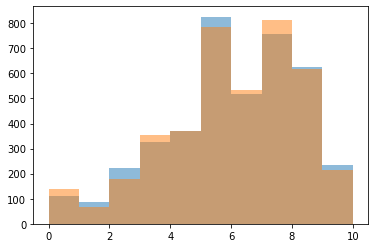

In [132]:
print(stats.describe(df1[df1.group == 'treatment'].ppltrst))
print(stats.shapiro(df1[df1.group == 'control'].ppltrst))
plt.hist(df1[df1.group == 'treatment'].ppltrst, alpha = .5)
plt.hist(df1[df1.group == 'control'].ppltrst, alpha = .5)
plt.show()

### The shape is not a perfect bell-shape however a W statistc close to 1 indicates that the distribution is similar to a normal distribution

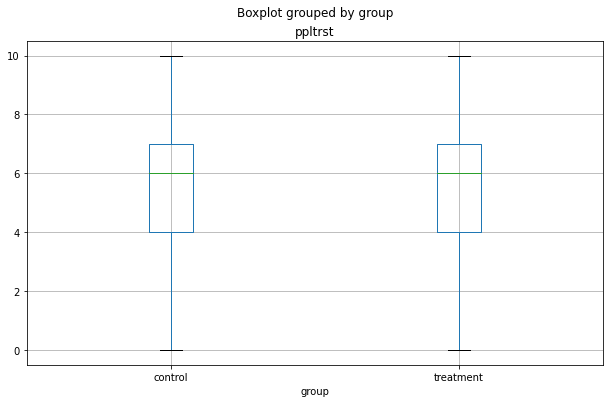

In [133]:
#Create a boxplot
df1.boxplot('ppltrst', by='group', figsize=(10, 6))

## 2. Did people become happier from 2012 to 2014?

DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


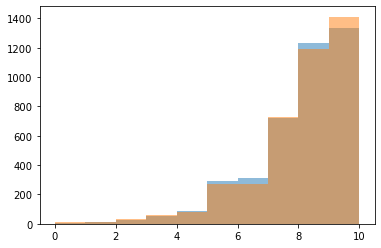

(0.8943395018577576, 0.0)


In [134]:
print(stats.describe(df1[df1.group == 'treatment'].happy))

plt.hist(df1[df1.group == 'treatment'].happy, alpha = .5)
plt.hist(df1[df1.group == 'control'].happy, alpha = .5)
plt.show()
print(stats.shapiro(df1[df1.group == 'control'].happy))

### Happiness does not appear normally distributed and p-value is zero. We need to use Kruskal-Wallis Test for a non-parametric test

In [135]:
stats.kruskal(df1[df1.group == 'control'].happy, df1[df1.group == 'treatment'].happy)

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

### Based on the p-value, we fail to reject the null that all variables have the same distribution

In [136]:
# How large is each group?
print('test sample size:', len(df1[df1.group == 'treatment']))
print('control sample size:', len(df1[df1.group == 'control']))
print('test proportion:', len(df1[df1.group == 'treatment'])/ len(df1))
print()

# Are the test and control groups significantly different?
stats.ttest_ind(df1[df1.group == 'treatment'].happy,
                df1[df1.group == 'control'].happy)

test sample size: 4076
control sample size: 4071
test proportion: 0.5003068614213821



Ttest_indResult(statistic=-1.2074597686358974, pvalue=0.22729019122839692)

### Regular t-test also has high p-value giving the same conclusion as Kruskal-Wallis Test

## 3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [137]:
# Select 3 countries
df2 = df[(df['cntry'] == 'ES') | (df['cntry'] =='NO') | (df['cntry'] =='SE')].copy()

In [138]:
df2.tail(2)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,year_survey,ones
8145,SE,3744,7,5,8,8,6,9,7,3,1,15,2,2014,1
8146,SE,3746,7,2,6,7,5,7,7,4,2,15,2,2014,1


In [139]:
social_pivot = pd.pivot_table(df2, values = ['sclmeet'], index=['cntry'], fill_value=0, margins=True)
social_pivot

,sclmeet
cntry,
ES,5.242583
NO,5.436620
SE,5.485516
All,5.370357


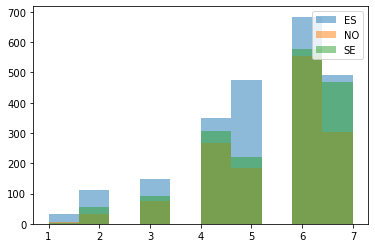

In [140]:
plt.hist(df[(df['cntry'] == 'ES')]['sclmeet'], alpha = .5, label='ES')
plt.hist(df[(df['cntry'] == 'NO')]['sclmeet'], alpha = .5, label='NO')
plt.hist(df[(df['cntry'] == 'SE')]['sclmeet'], alpha = .5, label='SE')
plt.legend(loc='upper right')
plt.show()

### Happiness does not appear normally distributed and p-value is zero. We need to use Kruskal-Wallis Test for a non-parametric test

In [141]:
stats.kruskal(df[(df['cntry'] == 'ES')]['sclmeet'], df[(df['cntry'] == 'NO')]['sclmeet'], df[(df['cntry'] == 'SE')]['sclmeet'])

KruskalResult(statistic=29.93628473986698, pvalue=3.1580453656002155e-07)

### Based on the p-value, we reject the null that all variables have the same distribution

## 4. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [142]:
df_3_country = df[(df['cntry'] == 'ES') | (df['cntry'] == 'NO') | (df['cntry'] == 'SE') & (df['year_survey'] == '2014')].copy()
df_3_country = df_3_country.loc[:, df_3_country.columns.intersection(['cntry','sclmeet','agea', 'ones'])]

In [143]:
df_3_country.tail()

,cntry,sclmeet,agea,ones
8142,SE,6,18,1
8143,SE,6,15,1
8144,SE,6,44,1
8145,SE,7,15,1
8146,SE,7,15,1


In [144]:
ES_pivot = pd.pivot_table(df_ES, values = ['sclmeet'], index=['agea'], fill_value=0, margins=True)
ES_pivot.round(0).head(3)

,sclmeet
agea,
16,5.0
17,6.0
18,6.0


### We create bin ranges for age data

In [145]:
# Set up interval rage for age
df_age_interval = pd.DataFrame({'G':['14 yo and younger','15-19','20-24','25-29','30-34', '35-39','40-44','45-49','50-54','55-59','60-64','65+']\
                                ,'Min':[0, 15,20,25,30,35,40,45,50,55,60,65] \
                                ,'Max':[14,19,24,29,34,39,44,49,54,59,64,120]})

In [146]:
cutoff = np.hstack([np.array(df_age_interval.Min[0]), df_age_interval.Max.values])
labels = df_age_interval.G.values
df_3_country['groups'] = pd.cut(np.array(df_3_country.agea), bins=cutoff, labels=labels, right=True, include_lowest=True)
print (df_3_country)

     cntry  sclmeet  agea  ones groups
2709    ES        7    70     1    65+
2710    ES        5    54     1  50-54
2711    ES        6    38     1  35-39
2712    ES        4    35     1  35-39
2713    ES        7    46     1  45-49
...    ...      ...   ...   ...    ...
8142    SE        6    18     1  15-19
8143    SE        6    15     1  15-19
8144    SE        6    44     1  40-44
8145    SE        7    15     1  15-19
8146    SE        7    15     1  15-19

[4579 rows x 5 columns]


In [147]:
df_3_country.describe()

,sclmeet,agea,ones
count,4579.000000,4579.000000,4579.0
mean,5.339157,47.518672,1.0
std,1.410524,18.390141,0.0
min,1.000000,15.000000,1.0
25%,4.000000,33.000000,1.0
50%,6.000000,47.000000,1.0
75%,6.000000,61.500000,1.0
max,7.000000,114.000000,1.0


In [148]:
df_3_pivot = pd.pivot_table(df_3_country, values = ['sclmeet'], index=['groups'], columns = ['cntry'], aggfunc={'sclmeet':'sum'}, fill_value=0, margins=True)
df_3_pivot.round(0)

sclmeet                   
cntry       ES    NO    SE    All
groups                           
15-19      671   708   413   1792
20-24      911   734   335   1980
25-29      783   460   376   1619
30-34     1069   539   295   1903
35-39     1095   591   316   2002
40-44     1140   715   298   2153
45-49     1133   854   374   2361
50-54     1171   650   352   2173
55-59      837   578   396   1811
60-64      901   587   409   1897
65+       2305  1304  1148   4757
All      12016  7720  4712  24448

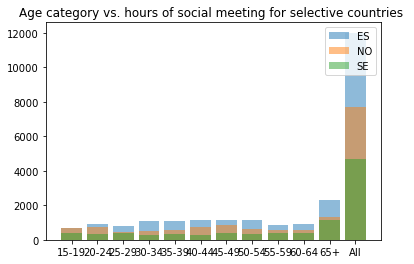

In [149]:
plt.bar(df_3_pivot.index, df_3_pivot[('sclmeet',  'ES')], alpha = .5, label='ES')
plt.bar(df_3_pivot.index, df_3_pivot[('sclmeet',  'NO')], alpha = .5, label='NO')
plt.bar(df_3_pivot.index, df_3_pivot[('sclmeet',  'SE')], alpha = .5, label='SE')
plt.title('Age category vs. hours of social meeting for selective countries ')
plt.legend(loc='upper right')
plt.show()

### Above shows people in Spain has more social interactions than Norwegian which are again more than Swedish for all age groups